In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as  sns

#한글 깨짐 방지

from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#경고 메세지 발생 무시

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기

train=pd.read_csv('C:/Users/82109/데이콘 연습자료/train_final.csv')
test=pd.read_csv('C:/Users/82109/데이콘 연습자료/test_final.csv')

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
train.shape, test.shape

((1459, 11), (715, 10))

열 설명

독립변수

id : 날짜와 시간별 id
temperature : 기온
precipitation : 비가 오지 않았으면 0, 비가 오면 1
windspeed : 풍속(평균)
humidity : 습도
visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
ozone : 오존
pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

종속변수 

count : 시간에 따른 따릉이 대여 수


In [6]:
#결측값이 존재함을 알 수 있다.

train.describe()


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [7]:
# 결측값 탐색
train.isnull().sum()

test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [8]:
# missingno 라이브러리로 결측값 시각화

import missingno as msno

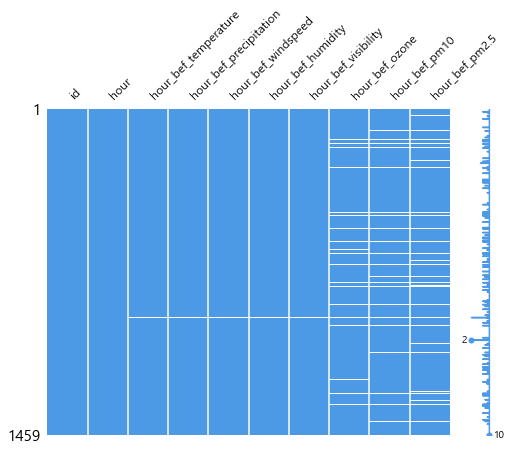

In [9]:

msno.matrix(train.loc[:,'id':'hour_bef_pm2.5'], figsize=(8,6), fontsize=12, color=(0.3,0.6,0.9))

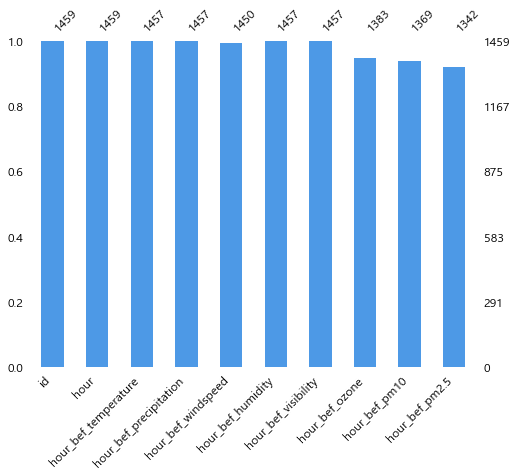

In [10]:

msno.bar(train.loc[:,'id':'hour_bef_pm2.5'], figsize=(8,6), fontsize=12, color=(0.3,0.6,0.9))

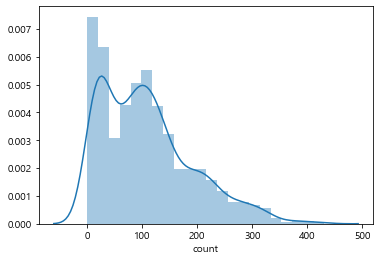

In [11]:
sns.distplot(train['count'])
plt.show()

In [12]:
print("Skewness: %f" % train['count'].skew())
print("Kurtosis: %f" % train['count'].kurt())

Skewness: 0.912534
Kurtosis: 0.460328


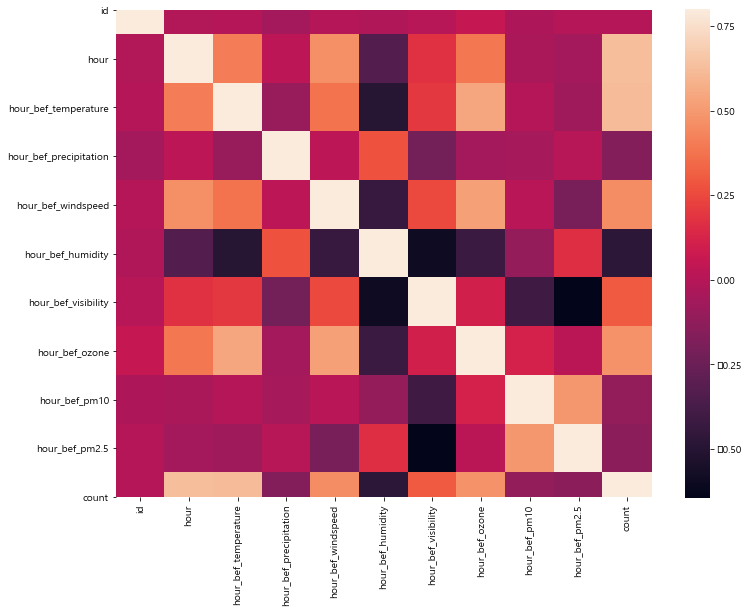

In [13]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

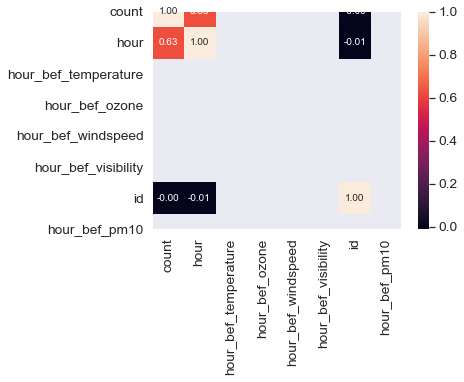

In [14]:
#saleprice correlation matrix
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'count')['count'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

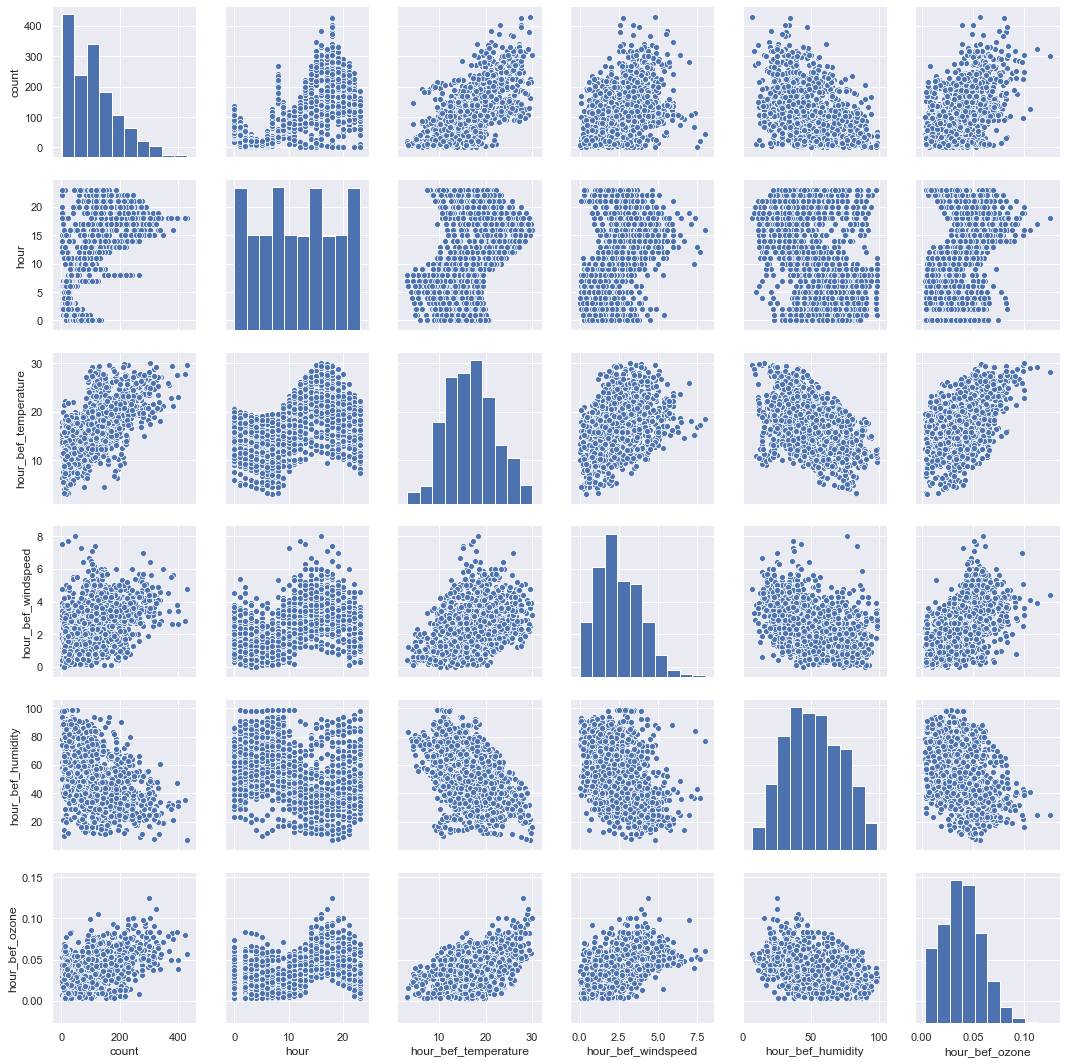

In [15]:
#scatterplot
sns.set()
cols = ['count', 'hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [16]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
# isnull().count()

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
hour_bef_pm2.5,117,0.080192
hour_bef_pm10,90,0.061686
hour_bef_ozone,76,0.052090
hour_bef_windspeed,9,0.006169
hour_bef_visibility,2,0.001371
hour_bef_humidity,2,0.001371
hour_bef_precipitation,2,0.001371
hour_bef_temperature,2,0.001371
count,0,0.000000
hour,0,0.000000


In [17]:
# 결측 처리 데이터 불러오기

train_mice=pd.read_csv('C:/Users/82109/데이콘 연습자료/train_mice.csv')
test_mice=pd.read_csv('C:/Users/82109/데이콘 연습자료/test_mice.csv')

In [18]:
#missing data
total = train_mice.isnull().sum().sort_values(ascending=False)
# isnull().count()

percent = (train_mice.isnull().sum()/train_mice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
count,0,0.0
hour_bef_pm2.5,0,0.0
hour_bef_pm10,0,0.0
hour_bef_ozone,0,0.0
hour_bef_visibility,0,0.0
hour_bef_humidity,0,0.0
hour_bef_windspeed,0,0.0
hour_bef_precipitation,0,0.0
hour_bef_temperature,0,0.0
hour,0,0.0


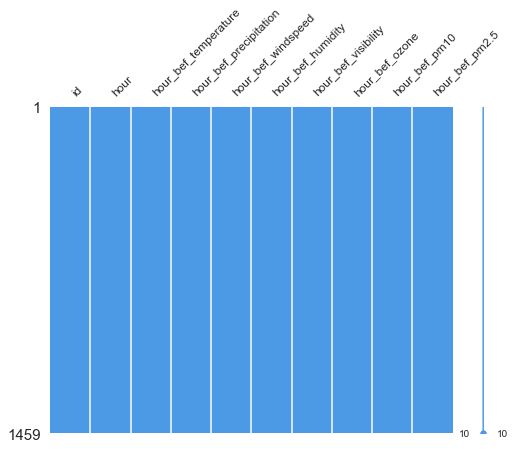

In [19]:
msno.matrix(train_mice.loc[:,'id':'hour_bef_pm2.5'], figsize=(8,6), fontsize=12, color=(0.3,0.6,0.9))
plt.show()

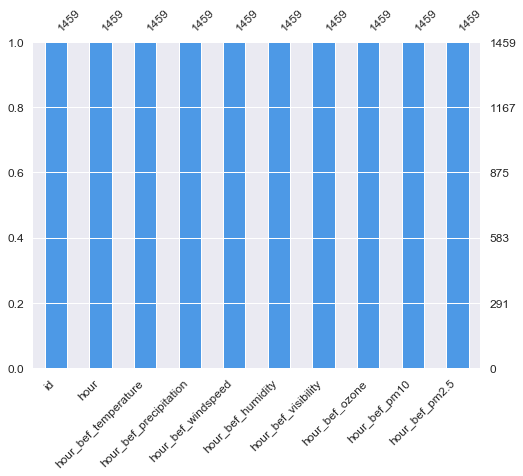

In [20]:
msno.bar(train_mice.loc[:,'id':'hour_bef_pm2.5'], figsize=(8,6), fontsize=12, color=(0.3,0.6,0.9))
plt.show()

In [21]:
import sklearn
from sklearn.model_selection import train_test_split

In [22]:
train_2= train_mice.drop(['id'],axis=1)
train_fit=train_2.drop(['count'],axis=1)
train_trg=train_2['count']
tr_x_mice,vl_x_mice,tr_y_mice,vl_y_mice=train_test_split(train_fit,train_trg,test_size=0.25,shuffle=True,random_state=613)

In [23]:
tr_x_mice.shape

(1094, 9)

In [24]:
tr_y_mice.shape

(1094,)

In [25]:
test_id=test_mice['id']
test_fit=test_mice.drop(['id'],axis=1)
test_fit.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,7,20.7,0,1.3,62,954,0.041,44,27
1,17,30.0,0,5.4,33,1590,0.061,49,36
2,13,19.0,1,2.1,95,193,0.020,36,28
3,6,22.5,0,2.5,60,1185,0.027,52,38
4,22,14.6,1,3.4,93,218,0.041,18,15


Text(0.5, 0, 'visibility')

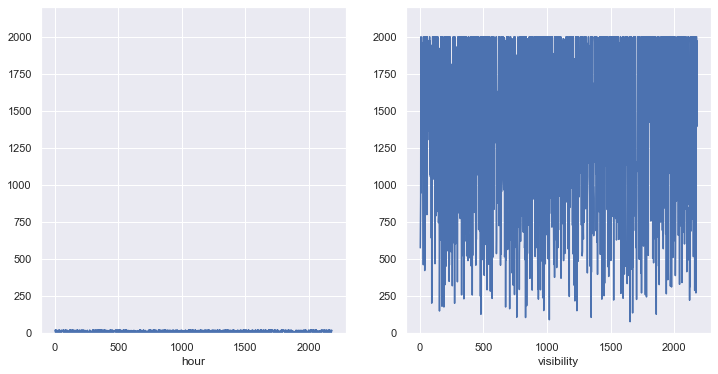

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_mice['id'],train_mice['hour'])
plt.ylim(0,2200);plt.xlabel('hour')

plt.subplot(1,2,2)
plt.plot(train_mice['id'],train_mice['hour_bef_visibility'])
plt.ylim(0,2200);plt.xlabel('visibility')


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import random

In [28]:
scaler=MinMaxScaler()
scaler.fit(tr_x_mice)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
tr_x_mice_scl=scaler.transform(tr_x_mice)
vl_x_mice_scl=scaler.transform(vl_x_mice)

In [30]:
tr_x_mice_scl=pd.DataFrame(tr_x_mice_scl,columns=tr_x_mice.columns)
tr_x_mice_scl.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0.086957,0.063910,0.0,0.129870,0.771739,0.972237,0.188525,0.070039,0.231707
1,0.260870,0.199248,0.0,0.194805,0.521739,1.000000,0.270492,0.073930,0.121951
2,0.391304,0.443609,1.0,0.181818,0.945652,0.141435,0.122951,0.136187,0.231707
3,0.956522,0.466165,0.0,0.038961,0.858696,0.217915,0.139344,0.217899,0.268293
4,0.956522,0.360902,0.0,0.350649,0.673913,0.442116,0.295082,0.221790,0.280488


In [31]:
vl_x_mice_scl=pd.DataFrame(vl_x_mice_scl,columns=tr_x_mice.columns)
vl_x_mice_scl.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0.913043,0.672932,0.0,0.350649,0.521739,1.000000,0.262295,0.085603,0.256098
1,0.869565,0.364662,0.0,0.519481,0.684783,0.662127,0.409836,0.163424,0.231707
2,0.217391,0.319549,0.0,0.324675,0.847826,0.358827,0.336066,0.178988,0.134146
3,0.869565,0.699248,0.0,0.571429,0.358696,1.000000,0.368852,0.089494,0.134146
4,0.565217,0.898496,0.0,0.298701,0.445652,0.350969,0.500000,0.245136,0.475610


In [32]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

In [33]:
model=LR()
model.fit(tr_x_mice_scl,tr_y_mice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
pred=model.predict(vl_x_mice_scl)

In [35]:
np.sqrt(MSE(vl_y_mice,pred))

48.74935811655757

In [36]:
test_id=test_mice['id']
test_fit=test_mice.drop(['id'],axis=1)
test_fit.head()
test_id

0         0
1         1
2         2
3         4
4         5
       ... 
710    2148
711    2149
712    2165
713    2166
714    2177
Name: id, Length: 715, dtype: int64

In [37]:
test_2=pd.DataFrame(scaler.transform(test_fit),columns=test_fit.columns)
test_2.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0.304348,0.657895,0.0,0.168831,0.597826,0.452069,0.311475,0.124514,0.231707
1,0.739130,1.007519,0.0,0.701299,0.282609,0.785228,0.475410,0.143969,0.341463
2,0.565217,0.593985,1.0,0.272727,0.956522,0.053431,0.139344,0.093385,0.243902
3,0.260870,0.725564,0.0,0.324675,0.576087,0.573075,0.196721,0.155642,0.365854
4,0.956522,0.428571,1.0,0.441558,0.934783,0.066527,0.311475,0.023346,0.085366


In [38]:
predicted=model.predict(test_2)
predicted[:20]

array([103.80087923, 241.37417387,  59.61692352, 109.64499363,
        99.4357812 , 142.10262202, 158.50773682, 237.92765752,
        76.20780982,  24.45948873, 231.0907444 , 216.64080752,
       182.13693693,  92.31114119, 196.43718626, 213.23425753,
        65.63521822, 140.07971846, 230.37905305, 185.05425659])

In [39]:
result=pd.DataFrame({'id':test_id,'count':predicted})
result.head(20)

,id,count
0,0,103.800879
1,1,241.374174
2,2,59.616924
3,4,109.644994
4,5,99.435781
5,10,142.102622
6,11,158.507737
7,12,237.927658
8,15,76.207810
9,17,24.459489


In [40]:
result.to_csv('submit_ghghdfd.csv',index=False)

In [41]:
# 의사결정나무 사용해보기

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.datasets import load_breast_cancer

DT= DecisionTreeRegressor(random_state=613)
 

DT.fit(tr_x_mice_scl,tr_y_mice)

DTlimit = DecisionTreeRegressor(max_depth=3, random_state=0)
 
#훈련 (가지치기 : 리프노드 깊이 제한)
DTlimit.fit(tr_x_mice_scl,tr_y_mice)

pred_2=DTlimit.predict(vl_x_mice_scl)

np.sqrt(MSE(vl_y_mice,pred_2))

44.845930863291684

In [42]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import mean_squared_error 

In [43]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=150,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [44]:
# A parameter grid for XGBoost
params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch

grid = GridSearchCV(model_xgb, params)

In [45]:
grid.fit(tr_x_mice_scl,tr_y_mice)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4603, gamma=0.0468,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1.7817, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=-1,
                                    objective='reg:line...
                                    scale_pos_weight=1, seed=None, silent=1,
                                    subsample=0.5213, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.03, 0.04, 0.05], 'max_depth': [2, 3, 4],
                         'min_child_

In [46]:
y_pred=grid.predict(vl_x_mice_scl)

np.sqrt(mean_squared_error(vl_y_mice,y_pred))

37.740892680597476

In [47]:
result_11=pd.DataFrame({'id':test_id,'count':grid.predict(test_2)})

In [48]:
result_11.to_csv('submission_11.csv',index=False)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=613)
gbrt.fit(tr_x_mice_scl, tr_y_mice)


# 최적의 트리 개수 찾기
errors = [mean_squared_error(vl_y_mice, y_pred)
          for y_pred in gbrt.staged_predict(vl_x_mice_scl)]
bst_n_estimators = np.argmin(errors)

bst_n_estimators

116

In [51]:
# 최적의 트리개수로 그래디언트 부스팅 학습
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=613)
gbrt_best.fit(tr_x_mice_scl, tr_y_mice)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=116,
                          n_iter_no_change=None, presort='auto',
                          random_state=613, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
y_pred=gbrt_best.predict(vl_x_mice_scl)
np.sqrt(mean_squared_error(vl_y_mice,y_pred))

39.085801049049834

In [53]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 240):
    gbrt.n_estimators = n_estimators
    gbrt.fit(tr_x_mice_scl, tr_y_mice)
    y_pred = gbrt.predict(vl_x_mice_scl)
    val_error = np.sqrt(mean_squared_error(vl_y_mice, y_pred))
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료


In [54]:
print('최적의 트리 개수 :', gbrt.n_estimators)
print("최소 검증 MSE:", min_val_error)



최적의 트리 개수 : 85
최소 검증 MSE: 39.39949329705739


In [55]:
gbrt=GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42,n_estimators=85)

In [56]:
gbrt.fit(tr_x_mice_scl,tr_y_mice)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=85,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)

In [57]:
np.sqrt(mean_squared_error(vl_y_mice,gbrt.predict(vl_x_mice_scl)))

39.40728271120181

In [124]:
result_13=pd.DataFrame({'id':test_id,'count':gbrt.predict(test_2)})

In [125]:
result_13.to_csv('submission_13.csv',index=False)

In [58]:
import xgboost as xgb
from sklearn.model_selection import KFold,GridSearchCV

In [59]:
xgbr=xgb.XGBRegressor(
    
    # General Parameter
    booster='gbtree', # 트리,회귀(gblinear) 트리가 항상 
                     # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
    
    silent= True,  # running message출력안한다.
                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.
    
    min_child_weight=8,   # 값이 높아지면 under-fitting 되는 
                          # 경우가 있다. CV를 통해 튜닝되어야 한다.
    
    max_depth=8 ,    # 트리의 최대 깊이를 정의함. 
                    # 루트에서 가장 긴 노드의 거리.
                    # 8이면 중요변수에서 결론까지 변수가 9개거친다.
                    # Typical Value는 3-10. 
    
    gamma =1,    # 노드가 split 되기 위한 loss function의 값이
                # 감소하는 최소값을 정의한다. gamma 값이 높아질 수록 
                # 알고리즘은 보수적으로 변하고, loss function의 정의
                #에 따라 적정값이 달라지기때문에 반드시 튜닝.
    
    nthread =4 ,   # XGBoost를 실행하기 위한 병렬처리(쓰레드)
                  #갯수. 'n_jobs' 를 사용해라.
    
    colsample_bytree=0.9 ,  # 트리를 생성할때 훈련 데이터에서 
                           # 변수를 샘플링해주는 비율. 보통0.6~0.9
    
    colsample_bylevel=0.9 , # 트리의 레벨별로 훈련 데이터의 
                           #변수를 샘플링해주는 비율. 보통0.6~0.9
    
    n_estimators =85 ,  #부스트트리의 양
                          # 트리의 갯수. 
    
    objective = 'reg:linear' , # 4가지 존재.
            # 회귀 경우 'reg', binary분류의 경우 'binary',
            # 다중분류경우 'multi'- 분류된 class를 return하는 경우 'softmax'
            # 각 class에 속할 확률을 return하는 경우 'softprob'
    
    random_state = 613 # random number seed.
                    # seed 와 동일.
)
xgbr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.9, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=8, missing=None, n_estimators=85,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=613,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [69]:
xgbr.fit(
    
    tr_x_mice_scl,     # Feature matrix ( 독립변수)
                       # X_train
    
    tr_y_mice,          # Labels (종속변수)
                       # Y_train
    
    eval_set=[(vl_x_mice_scl,vl_y_mice)],           # 빨리 끝나기 위해 검증데이터와 같이써야한다.  
                       # =[(X_train,Y_train),(X_vld, Y_vld)]
 
    eval_metric = 'rmse',  
              # validation set (검증데이터)에 적용되는 모델 선택 기준.
              # 평가측정. 
              # 회귀 경우 rmse ,  분류 -error   이외의 옵션은 함수정의
    
    early_stopping_rounds=45,
    verbose=5
              # 100번,20번 반복동안 최대화 되지 않으면 stop
)



[0]	validation_0-rmse:115.797
Will train until validation_0-rmse hasn't improved in 45 rounds.
[5]	validation_0-rmse:75.673
[10]	validation_0-rmse:53.2335
[15]	validation_0-rmse:43.0868
[20]	validation_0-rmse:39.3953
[25]	validation_0-rmse:38.1022
[30]	validation_0-rmse:37.7966
[35]	validation_0-rmse:37.6796
[40]	validation_0-rmse:37.5952
[45]	validation_0-rmse:37.7467
[50]	validation_0-rmse:37.8584
[55]	validation_0-rmse:37.8284
[60]	validation_0-rmse:37.8853
[65]	validation_0-rmse:37.8205
[70]	validation_0-rmse:37.8204
[75]	validation_0-rmse:37.7581
[80]	validation_0-rmse:37.7363
[84]	validation_0-rmse:37.7445
Stopping. Best iteration:
[39]	validation_0-rmse:37.5855



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.9, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=8, missing=None, n_estimators=85,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=613,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [61]:
y_pred=xgbr.predict(test_2)

In [62]:
result_12=pd.DataFrame({'id':test_id,'count':y_pred})

In [63]:
result_12.to_csv('submission_12.csv',index=False)

In [64]:
np.log1p(train_mice['count'])

0       3.912023
1       5.075174
2       3.295837
3       4.060443
4       6.068426
          ...   
1454    3.091042
1455    3.044522
1456    3.135494
1457    5.379897
1458    5.141664
Name: count, Length: 1459, dtype: float64

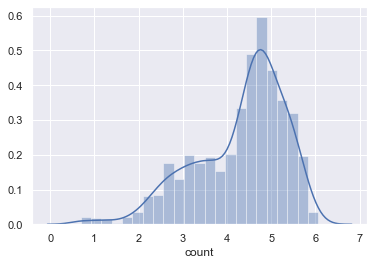

In [65]:
sns.distplot(np.log1p(train_mice['count']));

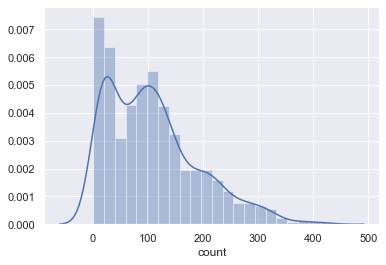

In [66]:
sns.distplot(train_mice['count']);

In [95]:
xgbr_2=xgb.XGBRegressor(
    
    # General Parameter
    booster='gbtree', # 트리,회귀(gblinear) 트리가 항상 
                     # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
    
    silent= True,  # running message출력안한다.
                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.
    
    min_child_weight=8,   # 값이 높아지면 under-fitting 되는 
                          # 경우가 있다. CV를 통해 튜닝되어야 한다.
    
    max_depth=8,    # 트리의 최대 깊이를 정의함. 
                    # 루트에서 가장 긴 노드의 거리.
                    # 8이면 중요변수에서 결론까지 변수가 9개거친다.
                    # Typical Value는 3-10. 
    
    gamma =1,    # 노드가 split 되기 위한 loss function의 값이
                # 감소하는 최소값을 정의한다. gamma 값이 높아질 수록 
                # 알고리즘은 보수적으로 변하고, loss function의 정의
                #에 따라 적정값이 달라지기때문에 반드시 튜닝.
    
    nthread =4 ,   # XGBoost를 실행하기 위한 병렬처리(쓰레드)
                  #갯수. 'n_jobs' 를 사용해라.
    
    colsample_bytree=0.9 ,  # 트리를 생성할때 훈련 데이터에서 
                           # 변수를 샘플링해주는 비율. 보통0.6~0.9
    
    colsample_bylevel=0.9 , # 트리의 레벨별로 훈련 데이터의 
                           #변수를 샘플링해주는 비율. 보통0.6~0.9
    
    n_estimators =119 ,  #부스트트리의 양
                          # 트리의 갯수. 
    
    objective = 'reg:linear' , # 4가지 존재.
            # 회귀 경우 'reg', binary분류의 경우 'binary',
            # 다중분류경우 'multi'- 분류된 class를 return하는 경우 'softmax'
            # 각 class에 속할 확률을 return하는 경우 'softprob'
    
    random_state = 613 # random number seed.
                    # seed 와 동일.
)
xgbr_2


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.9, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=8, missing=None, n_estimators=119,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=613,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [96]:

xgbr_2.fit(
    
    tr_x_mice_scl,     # Feature matrix ( 독립변수)
                       # X_train
    
    tr_y_mice,          # Labels (종속변수)
                       # Y_train
    
    eval_set=[(vl_x_mice_scl,vl_y_mice)],           # 빨리 끝나기 위해 검증데이터와 같이써야한다.  
                       # =[(X_train,Y_train),(X_vld, Y_vld)]
 
    eval_metric = 'rmse',  
              # validation set (검증데이터)에 적용되는 모델 선택 기준.
              # 평가측정. 
              # 회귀 경우 rmse ,  분류 -error   이외의 옵션은 함수정의
    
    early_stopping_rounds=45,
    verbose=5
              # 100번,20번 반복동안 최대화 되지 않으면 stop
)



[0]	validation_0-rmse:115.797
Will train until validation_0-rmse hasn't improved in 45 rounds.
[5]	validation_0-rmse:75.673
[10]	validation_0-rmse:53.2335
[15]	validation_0-rmse:43.0868
[20]	validation_0-rmse:39.3953
[25]	validation_0-rmse:38.1022
[30]	validation_0-rmse:37.7966
[35]	validation_0-rmse:37.6796
[40]	validation_0-rmse:37.5952
[45]	validation_0-rmse:37.7467
[50]	validation_0-rmse:37.8584
[55]	validation_0-rmse:37.8284
[60]	validation_0-rmse:37.8853
[65]	validation_0-rmse:37.8205
[70]	validation_0-rmse:37.8204
[75]	validation_0-rmse:37.7581
[80]	validation_0-rmse:37.7363
Stopping. Best iteration:
[39]	validation_0-rmse:37.5855



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.9, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=8, missing=None, n_estimators=119,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=613,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [98]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1, n_estimators=150,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =71, nthread = -1)
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=71,
             reg_alpha=0.464, reg_lambda=0.8571, scale_pos_weight=1, seed=None,
             silent=1, subsample=0.5213, verbosity=1)

In [99]:
# A parameter grid for XGBoost
params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch

grid = GridSearchCV(model_xgb, params)

In [100]:
grid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4603, gamma=0.0468,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=-1,
                                    objective='reg:linear', r...
                                    scale_pos_weight=1, seed=None, silent=1,
                                    subsample=0.5213, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.03, 0.04, 0.05], 'max_depth': [2, 3, 4],
                         'min_child

In [102]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)